## 作業



閱讀以下兩篇文獻，了解決策樹原理，並試著回答後續的問題
- [決策樹 (Decision Tree) - 中文](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
- [how decision tree works - 英文](http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/)

1. 在分類問題中，若沒有任何限制，決策樹有辦法在訓練時將 training loss 完全降成 0 嗎？
2. 決策樹只能用在分類問題嗎？還是可以用來解決回歸問題？


In [16]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [11]:
iris_df = pd.concat([x,y],axis=1)

## 資料切分

In [65]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle=True)

In [189]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [190]:
y_pred = clf.predict(X_test)

## 驗證

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [192]:
accuracy_score(y_true=y_test,y_pred=y_pred)

0.9777777777777777

In [193]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [194]:
from sklearn import tree

In [195]:
import graphviz

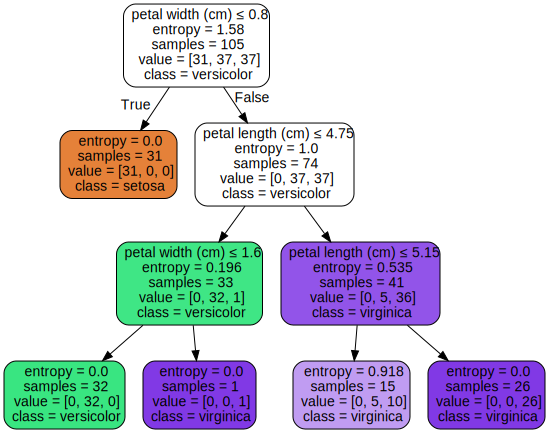

In [196]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=iris.feature_names,  
...                      class_names=iris.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 